In [ ]:
import numpy as np #Linear algebra and mathematical operations
import pandas as pd #importing and loading data
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import time

In [ ]:
iris_df = pd.read_csv("/content/drive/MyDrive/Data Science /Iris.csv")
iris_df = iris_df.sample(frac=1).reset_index(drop=True) # Shuffle

In [ ]:
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,82,5.5,2.4,3.7,1.0,Iris-versicolor
1,86,6.0,3.4,4.5,1.6,Iris-versicolor
2,80,5.7,2.6,3.5,1.0,Iris-versicolor
3,45,5.1,3.8,1.9,0.4,Iris-setosa
4,122,5.6,2.8,4.9,2.0,Iris-virginica


In [ ]:

X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)
X[:5]


array([[5.5, 2.4, 3.7, 1. ],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 2.6, 3.5, 1. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.6, 2.8, 4.9, 2. ]])

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)
Y = iris_df.Species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
class ANN_Classification():

  
    def __init__ (self, hidden_Layer_Size = [100,], learning_Rate = 0.001, epochs = 10,  hyperparameter = False):
        self.hidden_Layer_Size = hidden_Layer_Size
        self.learning_Rate = learning_Rate
        self.epochs = epochs
       # self.activation_function = activation_function
        self.weights = None
        self.hyperparameter = hyperparameter

    
    def sigmoid(self, x, derivative=False):
        if derivative:
            return np.multiply(x, 1-x)
        return 1/(1 + np.exp(-x))
        

    def softmax(self, x):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)
            

    #function for forward propogation
    def forward_Prop(self, x, layers):
        activations, layer_input = [x], x
        for j in range(layers):
         # i = 
          #print("i = "+str(i))
          if j <= (layers-1):

            activation = self.sigmoid(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation)

          else :
            activation = self.softmax(np.dot(layer_input, self.weights[j].T))
            activations.append(activation)
            layer_input = np.append(1, activation)

        return activations


    def back_prop(self, y, activations, layers):
      outputFinal = activations[-1]
      error = np.matrix(y - outputFinal) 
      
      # Error after 1 cycle
      for j in range(layers, 0, -1):
        currActivation = activations[j]
       
        if(j > 1):
          # Append previous
          prevActivation = np.append(1, activations[j-1])
        else:
          # First hidden layer
          prevActivation = activations[0]
       
        delta = np.multiply(error, self.sigmoid(currActivation, derivative = True))
        self.weights[j-1] += self.learning_Rate * np.multiply(delta.T, prevActivation)
         
        wc = np.delete(self.weights[j-1], [0], axis=1)
        error = np.dot(delta, wc) #current layer error
       
      return self.weights

    
    def initialize_Weight(self, layers):
      layer, self.weights = len(layers), []
      #for loop to intialize the weight randomly
      for i in range(1, layer):
        #assigning random weights
        w = [[np.random.uniform(-1, 1) for j in range(layers[i-1] + 1)]for k in range(layers[i])]
        self.weights.append(np.matrix(w))
    
      return self.weights
    

    #train function
    def train(self, X, y):
        layers_weights = len(self.weights)
        
        for i in range(len(self.X)):
          x, y = self.X[i], self.y[i]
          x = np.matrix(np.append(1, x))
          
          activations = self.forward_Prop(x, layers_weights)
          self.weights = self.back_prop(y, activations, layers_weights)
          
        return self.weights


    def fit(self, X, y):
        intiate_time = time.perf_counter()
        self.X = X
        self.y = y
        hidden_Layers = len(self.hidden_Layer_Size) - 1
        self.weights = self.initialize_Weight(self.hidden_Layer_Size)

        for epoch in range(1, self.epochs+1):
          epoch_intiate_time = time.perf_counter()
          weights = self.train(self.X, self.y)

          epoch_closing_time = time.perf_counter()
          closing_time = time.perf_counter()
          
          epoch_total_time = epoch_closing_time - epoch_intiate_time
          total_time = closing_time - intiate_time
          
          if self.hyperparameter == False:
            print ("Epoch : {}".format(epoch))
            print ("Elapsed Time : {}".format(total_time))
            print ("Step Time : {}\n\n".format(epoch_total_time))
            
        return self.weights

        
    def Predict(self, X):
        result = []
        for i in range(len(X)):
          x = X[i]
          #print(str(i) + " " + str(len(X)))
          layers = len(self.weights)
          item = np.append(1, x)

          # Forward prop.
          activations = self.forward_Prop(item, layers)
          
          Final_output = activations[-1].A1
          index = self.FindMaxActivation(Final_output)
          
          predicted = [0 for j in range(len(Final_output))]
          predicted[index] = 1 
      
          
          result.append(predicted)
        
        return result
      
    def FindMaxActivation(self, output):
        m, index = output[0], 0
        for i in range(1, len(output)):
          if(output[i] > m):
            m, index = output[i], i
        
        return index

In [ ]:
first = len(X[0]) # no. of features
output = len(Y[0]) # no. of classes

# Define hyperparameters to search over
hidden_layer_sizes = [[first, 50, output], [first, 100, output], [first, 50, 50, output], [first, 100, 100, output]]
learning_rates = [0.001, 0.01, 0.1, 0.15, 0.05]
epochs = [10, 20, 30, 100, 200]

best_score = 0
best_params = {}

# Loop over all possible hyperparameter combinations
for hidden_size in hidden_layer_sizes:
    for lr in learning_rates:
        for epoch in epochs:
            
            model = ANN_Classification(hidden_Layer_Size=hidden_size, learning_Rate=lr, epochs=epoch, hyperparameter = True)
            model.fit(X_train, Y_train)
            
            y_pred = model.Predict(X_test)
            score = accuracy_score(Y_test, y_pred)
            
            if score > best_score:
                best_score = score
                best_params = {'hidden_Layer_Size': hidden_size, 'learning_Rate': lr, 'epochs': epoch}

final_model = ANN_Classification(**best_params)
final_model.fit(np.concatenate([X_train, X_test]), np.concatenate([Y_train, Y_test]))


y_pred_aht = final_model.Predict(X_test)
final_score = accuracy_score(Y_test, y_pred_aht)
print("Best Parameters : {}".format(best_params))
print("Final Score = {}".format(final_score))

Epoch : 1
Elapsed Time : 0.04345069600003626
Step Time : 0.041986236000411736


Epoch : 2
Elapsed Time : 0.08470971200040367
Step Time : 0.03991207600029156


Epoch : 3
Elapsed Time : 0.12224845800028561
Step Time : 0.03645719599990116


Epoch : 4
Elapsed Time : 0.15226905600047758
Step Time : 0.029168797999773233


Epoch : 5
Elapsed Time : 0.18499893199987127
Step Time : 0.03190725700005714


Epoch : 6
Elapsed Time : 0.21441254999990633
Step Time : 0.028565716999764845


Epoch : 7
Elapsed Time : 0.24528505699981906
Step Time : 0.03005738800038671


Epoch : 8
Elapsed Time : 0.2824066330003916
Step Time : 0.03615322599944193


Epoch : 9
Elapsed Time : 0.31678266000017175
Step Time : 0.03417305699986173


Epoch : 10
Elapsed Time : 0.34606215700023313
Step Time : 0.029075157000079344


Epoch : 11
Elapsed Time : 0.37579741399986233
Step Time : 0.02855480800008081


Epoch : 12
Elapsed Time : 0.4096572010003001
Step Time : 0.033654326999567274


Epoch : 13
Elapsed Time : 0.44071867799993925


In [ ]:
first = len(X[0]) # no. of features
output = len(Y[0]) # no. of classes

layers = [first, 5, 10, output] # no. of nodes 
L, E = 0.15, 200
#calling neural network function
weights = ANN_Classification(hidden_Layer_Size = layers, epochs=E, learning_Rate = L)

In [ ]:
ans = weights.fit(X_train, Y_train)

Epoch : 1
Elapsed Time : 0.06136934400001337
Step Time : 0.06061829400005081


Epoch : 2
Elapsed Time : 0.11987904800025717
Step Time : 0.05710176400043565


Epoch : 3
Elapsed Time : 0.1765031530003398
Step Time : 0.055488805000095454


Epoch : 4
Elapsed Time : 0.22845579800014093
Step Time : 0.05082275499989919


Epoch : 5
Elapsed Time : 0.2797742329994435
Step Time : 0.05018643499988684


Epoch : 6
Elapsed Time : 0.32910916800028645
Step Time : 0.048094865000166465


Epoch : 7
Elapsed Time : 0.38141330300004483
Step Time : 0.05119512599958398


Epoch : 8
Elapsed Time : 0.43381238900019525
Step Time : 0.05130955599997833


Epoch : 9
Elapsed Time : 0.4854090039998482
Step Time : 0.050402185000166355


Epoch : 10
Elapsed Time : 0.5339897989997553
Step Time : 0.04743967500053259


Epoch : 11
Elapsed Time : 0.5940276629999062
Step Time : 0.05888806500024657


Epoch : 12
Elapsed Time : 0.6456019090001064
Step Time : 0.05041591499957576


Epoch : 13
Elapsed Time : 0.7012694630002443
Step Ti

In [ ]:
y_pred_manual = weights.Predict(X_test)
score_manual = accuracy_score(Y_test, y_pred_manual)

# **Using Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
# Build the model

model = Sequential()

model.add(Dense(5, input_shape=(4,), activation='sigmoid', name='h1'))
model.add(Dense(10, activation='sigmoid', name='h2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.15)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1655 - accuracy: 0.3937
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9541 - accuracy: 0.4646
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6763 - accuracy: 0.6614
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7874
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4141 - accuracy: 0.7559
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8976
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9213
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1542 - accuracy: 0.9528
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1473 - accuracy: 0.9291
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9291
Epoch 11/200
4/4 [===========

In [ ]:
loss, score_keras = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 141ms/step - loss: 0.1243 - accuracy: 0.9565


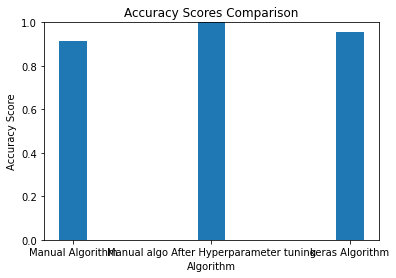

In [ ]:
import matplotlib.pyplot as plt

# Plot the comparison graph for manual accuracy score and keras accuracy score.
labels = ['Manual Algorithm','Manual algo After Hyperparameter tuning', 'keras Algorithm']
scores = [score_manual, final_score, score_keras]
plt.bar(labels, scores, width = 0.2)
plt.ylim([0, 1])
plt.title('Accuracy Scores Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.show()